In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [45]:
df = pd.read_csv("Suicide_Rate(TOATAL).csv")
df = df.drop([df.index[0]])
df.head(5)

,Country,mean,2016,2015,2010,2005,2000
1,Lithuania,39.74,31.9,34.9,37.3,43.9,50.7
2,Belarus,35.78,26.2,26.3,38.2,45.1,43.1
3,Ukraine,28.80,22.4,23.1,27.1,34.5,36.9
4,Latvia,25.38,21.2,21.6,22.7,26.7,34.7
5,Kazakhstan,30.70,22.5,24.9,32.7,39.4,34.0


In [46]:
df = df.drop(['2016','2015','2010','2005','2000'], axis='columns')
df.head(5)

,Country,mean
1,Lithuania,39.74
2,Belarus,35.78
3,Ukraine,28.80
4,Latvia,25.38
5,Kazakhstan,30.70


In [47]:
df.rename(columns={"mean":"Suicide Rate"},inplace = True)
df.head(5)

,Country,Suicide Rate
1,Lithuania,39.74
2,Belarus,35.78
3,Ukraine,28.80
4,Latvia,25.38
5,Kazakhstan,30.70


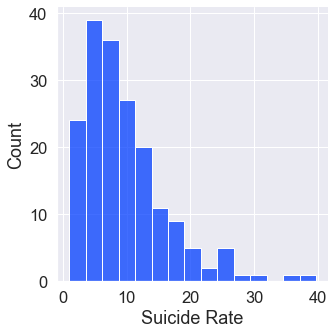

In [48]:
sns.displot(df['Suicide Rate'])

In [50]:
fig = go.Figure(data=go.Choropleth(
    locations = df['Country'],
    locationmode='country names',
    z = df['Suicide Rate'],
    text = df['Country'],
    colorscale = 'gray',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.1,
    colorbar_title = 'Suicide Rate'),
    layout = dict(title='World Average Suicide Rate', 
                  geo=dict(showframe=False#, projection={'type': 'Equirectangular'}
                          ))
)
fig.show()